In [1]:
import DigitalContactTracing as DCT
from load_temporal_graph import *

%load_ext autoreload
%autoreload 2

In [14]:

PARAMETERS = {"temporal_gap" : 900,
              "memory_contacts" : 7, # days
              "max_time_quar" : 10, # days
              "policies" : {"policy1":[600]},
              "eps_Is" : [0.5,0.2],
              "times" : 2,
              "seed" : 11,
              "Y_i" : 10,
              "nc" : 0.2,
              "beta_t": 0.002,
              "symptomatics" : 0.8,   # number of symptomatic people (old notation: p)
              "testing" : 0.25,
              "store":{"to_store": True,
                       "path_to_store":"RESULTS_Socio/"}} 


In [18]:
df = load_df_socio("Dataset/High-School.csv")
graphs = build_graphs_socio(get_array_of_contacts_socio(df,PARAMETERS["temporal_gap"]),PARAMETERS["temporal_gap"])

In [27]:

np.random.seed(PARAMETERS["seed"])

for eps_I in PARAMETERS["eps_Is"]:
    for policy in PARAMETERS["policies"]:
        filter_duration = PARAMETERS["policies"][policy][0]
        filter_rssi=None
        results = []
        for i in range(PARAMETERS["times"]):
            print("-"*100)
            dct = DCT.DigitalContactTracing(graphs = graphs,
                                            PARAMETERS = PARAMETERS,
                                            eps_I=eps_I,
                                            filter_rssi=filter_rssi,
                                            filter_duration=filter_duration,
                                            SOCIOPATTERN = True)
            
            res = dct.simulate()
            results.append(res)
            
        DCT.store_results(results,PARAMETERS,filter_rssi,filter_duration,eps_I)
        

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Simulation saved in  RESULTS_Socio/
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Simulation saved in  RESULTS_Socio/


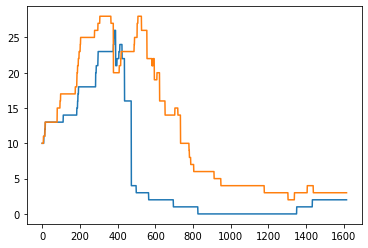

In [30]:
inf = DCT.load_results("RESULTS_Socio/","act_inf",eps_I,filter_rssi,filter_duration)

for i in inf:
    plt.plot(i)